# Used Car Price Prediction Project:-

# Problem Statement:-

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset:-

In [100]:
df = pd.read_excel("Cardekho_Used_Cars.xlsx") #Reading excel file
df

Unnamed: 0               Car_Name         Car_variant Fuel_type  \
0              0       2014 Hyundai i20          Sportz 1.2    Petrol   
1              1  2018 Mahindra Marazzo             M4 8Str    Diesel   
2              2   2015 Mahindra XUV500              W8 FWD    Diesel   
3              3    2018 Renault Duster      Petrol RXS CVT    Petrol   
4              4    2017 Renault Duster      Petrol RXS CVT    Petrol   
...          ...                    ...                 ...       ...   
5005        5005   2013 Mahindra XUV500              W8 2WD    Diesel   
5006        5006        2010 Honda City            1.5 S MT    Petrol   
5007        5007       2013 Honda Amaze           S i-Dtech    Diesel   
5008        5008       2010 Hyundai i20           1.2 Magna    Petrol   
5009        5009  2014 Volkswagen Vento  Petrol Comfortline    Petrol   

     Running_kms Engine_disp Gear_transmission Mileage(km/ltr) Seating_cap  \
0     39,683 kms     1197 CC            Manual       18.5 kmpl           5   
1     37,222 kms     1497 CC            Manual       17.3 kmpl           8   
2     90,281 kms     2179 CC            Manual       15.1 kmpl           7   
3     33,139 kms     1498 CC         Automatic      14.99 kmpl           5   
4     31,525 kms     1498 CC         Automatic      14.99 kmpl           5   
...          ...         ...               ...             ...         ...   
5005  75,000 kms     2179 CC            Manual       15.1 kmpl           7   
5006  72,000 kms     1497 CC            Manual         17 kmpl           5   
5007  75,000 kms     1498 CC            Manual       25.8 kmpl           5   
5008  46,000 kms     1197 CC            Manual       18.5 kmpl           5   
5009  96,000 kms     1598 CC            Manual      15.04 kmpl           5   

          Color  ... cargo_volume   Height    Width   Length  Weight  \
0          Blue  ...            -   1505mm   1710mm   3995mm       -   
1         Black  ...          190  1774 mm  1866 mm  4585 mm       -   
2         White  ...            -   1785mm   1890mm   4585mm  2450kg   
3        Silver  ...   475-litres   1695mm   1822mm   4315mm  1770kg   
4     Fiery Red  ...   475-litres   1695mm   1822mm   4315mm  1770kg   
...         ...  ...          ...      ...      ...      ...     ...   
5005      White  ...            -   1785mm   1890mm   4585mm  2450kg   
5006      White  ...   506 litres  1480 mm  1695 mm  4420 mm       -   
5007       Grey  ...   400-litres   1505mm   1680mm   3990mm       -   
5008      White  ...            -  1505 mm  1710 mm  3940 mm       -   
5009     Silver  ...   480-litres   1466mm   1699mm   4384mm  1720kg   

     Top_speed                 Torque                  Engine_type  \
0            -                113.7Nm     Kappa VTVT Petrol Engine   
1            -                  300Nm  D15 1.5 Liter Diesel Engine   
2     175 kmph                  330Nm          mHawk Diesel Engine   
3     160 Kmph                  142Nm            H4K Petrol Engine   
4     160 Kmph                  142Nm            H4K Petrol Engine   
...        ...                    ...                          ...   
5005  175 kmph                  330Nm          mHawk Diesel Engine   
5006         -      146Nm at 4800 rpm               In-Line Engine   
5007  170 Kmph                  200Nm         i-DTEC Diesel Engine   
5008         -  11.4 kgm at 4,000 rpm               In-Line Engine   
5009  185km/hr                  153Nm        In Line Petrol Engine   

                                                    URL      Price  
0     https://www.cardekho.com/buy-used-car-details/...  3.75 Lakh  
1     https://www.cardekho.com/buy-used-car-details/...  8.79 Lakh  
2     https://www.cardekho.com/buy-used-car-details/...  8.27 Lakh  
3     https://www.cardekho.com/buy-used-car-details/...  7.10 Lakh  
4     https://www.cardekho.com/buy-used-car-details/...  7.50 Lakh  
...                                                 ...        ...  
500

Here i have to predict the used car price and the Car_Price column is a continuous data so it's a Regression problem.

In [101]:
#delete unnessesary column
df=df.drop(['Unnamed: 0'],axis=1)

In [102]:
df.head()

Car_Name     Car_variant Fuel_type Running_kms Engine_disp  \
0       2014 Hyundai i20      Sportz 1.2    Petrol  39,683 kms     1197 CC   
1  2018 Mahindra Marazzo         M4 8Str    Diesel  37,222 kms     1497 CC   
2   2015 Mahindra XUV500          W8 FWD    Diesel  90,281 kms     2179 CC   
3    2018 Renault Duster  Petrol RXS CVT    Petrol  33,139 kms     1498 CC   
4    2017 Renault Duster  Petrol RXS CVT    Petrol  31,525 kms     1498 CC   

  Gear_transmission Mileage(km/ltr) Seating_cap      Color Max_power  ...  \
0            Manual       18.5 kmpl           5       Blue     82.85  ...   
1            Manual       17.3 kmpl           8      Black       121  ...   
2            Manual       15.1 kmpl           7      White       140  ...   
3         Automatic      14.99 kmpl           5     Silver     104.5  ...   
4         Automatic      14.99 kmpl           5  Fiery Red     104.5  ...   

  cargo_volume   Height    Width   Length  Weight Top_speed   Torque  \
0            -   1505mm   1710mm   3995mm       -         -  113.7Nm   
1          190  1774 mm  1866 mm  4585 mm       -         -    300Nm   
2            -   1785mm   1890mm   4585mm  2450kg  175 kmph    330Nm   
3   475-litres   1695mm   1822mm   4315mm  1770kg  160 Kmph    142Nm   
4   475-litres   1695mm   1822mm   4315mm  1770kg  160 Kmph    142Nm   

                   Engine_type  \
0     Kappa VTVT Petrol Engine   
1  D15 1.5 Liter Diesel Engine   
2          mHawk Diesel Engine   
3            H4K Petrol Engine   
4            H4K Petrol Engine   

                                                 URL      Price  
0  https://www.cardekho.com/buy-used-car-details/...  3.75 Lakh  
1  https://www.cardekho.com/buy-used-car-details/...  8.79 Lakh  
2  https://www.cardekho.com/buy-used-car-details/...  8.27 Lakh  
3  https://www.cardekho.com/buy-used-car-details/...  7.10 Lakh  
4  https://www.cardekho.com/buy-used-car-details/...  7.50 Lakh  

[5 rows x 22 columns]

In [103]:
df.columns

Index(['Car_Name', 'Car_variant', 'Fuel_type', 'Running_kms', 'Engine_disp',
       'Gear_transmission', 'Mileage(km/ltr)', 'Seating_cap', 'Color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'Height', 'Width', 'Length', 'Weight', 'Top_speed', 'Torque',
       'Engine_type', 'URL', 'Price'],
      dtype='object')

# Features Information:-

# EDA:-

In [104]:
df.shape

(5010, 22)

In [105]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 5010 observations with 22 features.


In [106]:
#for columns
df.columns

Index(['Car_Name', 'Car_variant', 'Fuel_type', 'Running_kms', 'Engine_disp',
       'Gear_transmission', 'Mileage(km/ltr)', 'Seating_cap', 'Color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'Height', 'Width', 'Length', 'Weight', 'Top_speed', 'Torque',
       'Engine_type', 'URL', 'Price'],
      dtype='object')

These are the list of column names in the dataset.

In [107]:
df.dtypes

Car_Name             object
Car_variant          object
Fuel_type            object
Running_kms          object
Engine_disp          object
Gear_transmission    object
Mileage(km/ltr)      object
Seating_cap          object
Color                object
Max_power            object
front_brake_type     object
rear_brake_type      object
cargo_volume         object
Height               object
Width                object
Length               object
Weight               object
Top_speed            object
Torque               object
Engine_type          object
URL                  object
Price                object
dtype: object

# Checking Null Values:-

In [108]:
#Checking for missing values
df.isnull().sum()

Car_Name              0
Car_variant           0
Fuel_type             0
Running_kms           0
Engine_disp           1
Gear_transmission     0
Mileage(km/ltr)       1
Seating_cap           1
Color                 1
Max_power             1
front_brake_type      1
rear_brake_type       1
cargo_volume          0
Height                1
Width                 1
Length                1
Weight                1
Top_speed            42
Torque                1
Engine_type           1
URL                   0
Price                 0
dtype: int64

As we know there is some  '-' And null values are present inside our dataset so we have to replace with nan values

In [109]:
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [110]:
#again check
df.isnull().sum()

Car_Name                0
Car_variant             0
Fuel_type               0
Running_kms             0
Engine_disp            66
Gear_transmission       0
Mileage(km/ltr)       147
Seating_cap            68
Color                  73
Max_power             113
front_brake_type      136
rear_brake_type       137
cargo_volume          983
Height                143
Width                 144
Length                142
Weight               2680
Top_speed            1894
Torque                113
Engine_type           202
URL                     0
Price                   0
dtype: int64

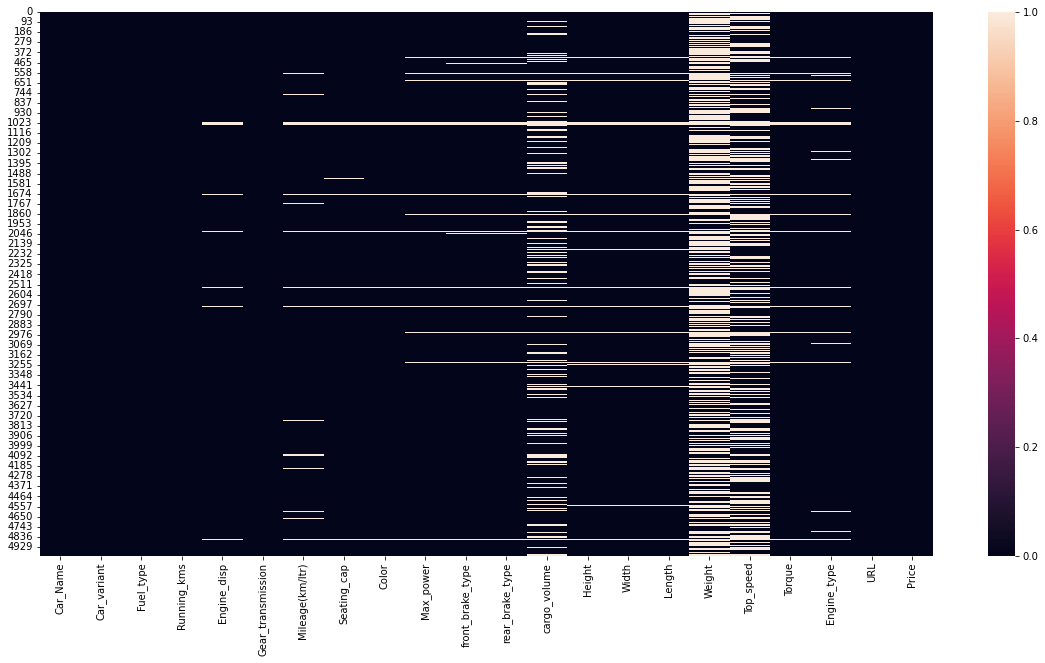

In [111]:
plt.figure(figsize=[20,10])
sns.heatmap(df.isnull())
plt.show()

As we can see these are the nan values are present in our dataset

In [112]:
#Dropping unnecessary columns
df.drop(columns = ['cargo_volume'], inplace = True)

In [113]:
#inormation about our dataet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           5010 non-null   object
 1   Car_variant        5010 non-null   object
 2   Fuel_type          5010 non-null   object
 3   Running_kms        5010 non-null   object
 4   Engine_disp        4944 non-null   object
 5   Gear_transmission  5010 non-null   object
 6   Mileage(km/ltr)    4863 non-null   object
 7   Seating_cap        4942 non-null   object
 8   Color              4937 non-null   object
 9   Max_power          4897 non-null   object
 10  front_brake_type   4874 non-null   object
 11  rear_brake_type    4873 non-null   object
 12  Height             4867 non-null   object
 13  Width              4866 non-null   object
 14  Length             4868 non-null   object
 15  Weight             2330 non-null   object
 16  Top_speed          3116 non-null   object


In the info about the dataset and i can see some missing values in the dataset.

# Feature engineering or Extraction:-

# Car_name:-

The column Car_Name is containing manufacturing year of the car, Brand name of the car and model name of the car. So, I will be extracting 3 different columns from the column Car_Name.

In [114]:
#Extracting manufacturing year and car name from Car_Name
df['Manu_year']=df['Car_Name'].str[0:4]
# Creating car_name column and storing the remaining values other than year in it. 
df['car_name']=df['Car_Name'].str[4:]
# Dropping Car_Name column as I have stored the data in car_name column instead
df.drop(columns='Car_Name', inplace = True)

In [115]:
# Extracting Brand and Model from Car_name column
df['Car_Brand']=df.car_name.str.split(' ').str.get(1)
df['Car_Model']=df.car_name.str.split(' ').str[2:]
df['Car_Model']=df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model']=df['Car_Model'].str.replace(',',' ')
df.drop(columns='car_name', inplace = True)   # Dropping Car_name column after extraction

# Car_Price:-

AS we know Car_Price is our target column so it should be in the format of continuous data, so we have change the car_price column from lakhs and crores to integer format.

In [116]:
df['Price'] = df['Price'].str.replace('Lakh','')

In [117]:
df["Price"]

0       3.75 
1       8.79 
2       8.27 
3       7.10 
4       7.50 
        ...  
5005    4.45 
5006    2.70 
5007    2.50 
5008    2.40 
5009    3.70 
Name: Price, Length: 5010, dtype: object

In [118]:
df['car_price'] = df['Price'].str.replace('Lakh','100000')
df['car_price'] = df['Price'].str.replace(',','')
df['car_price'] = df['Price'].str.replace('Cr','10000000')

In [119]:
df[['a','b']] = df.car_price.str.split(expand=True)

In [120]:
df['a'] = df['a'].astype('float')
df['b'] = df['b'].astype('float')

In [121]:
df.isnull().sum()

Car_variant             0
Fuel_type               0
Running_kms             0
Engine_disp            66
Gear_transmission       0
Mileage(km/ltr)       147
Seating_cap            68
Color                  73
Max_power             113
front_brake_type      136
rear_brake_type       137
Height                143
Width                 144
Length                142
Weight               2680
Top_speed            1894
Torque                113
Engine_type           202
URL                     0
Price                   0
Manu_year               0
Car_Brand               0
Car_Model               0
car_price               0
a                       0
b                    5001
dtype: int64

In [122]:
df['b']=df['b'].fillna(value = 1)

In [123]:
df['car_price'] = df['a'] * df['b']

In [124]:
df.drop(columns = ['Price','a','b'], inplace = True)

# Running_kms:-

In [125]:
# Replacing kms and "," sign by empty space from the column
df['Running_kms'] = df['Running_kms'].str.replace('kms','')
df['Running_kms'] = df['Running_kms'].str.replace(',','')

df['Running_kms'] = df['Running_kms'].str.replace('1 Lakh ','100000')
df['Running_kms'] = df['Running_kms'].astype('float')

# Engine_disp:-

This column should be continuous column so i will convert it to float datatype.

In [126]:
df['Engine_disp'] = df['Engine_disp'].str.replace('CC','')

In [127]:
df.Engine_disp=df.Engine_disp.astype('float')

# Mileage(km/ltr):-

The column  is  having some string values like "kmpl", "km/kg" and "km/hr" so, I will be removing/ replacing by empty space and converting column from object data type into float data type.

In [128]:
# Replacing string values by empty space
df['Mileage(km/ltr)'] = df['Mileage(km/ltr)'].str.replace('kmpl','')
df['Mileage(km/ltr)'] = df['Mileage(km/ltr)'].str.replace('km/kg','')
df['Mileage(km/ltr)'] = df['Mileage(km/ltr)'].str.replace('km/hr','')
# Converting object data type into float data type
df['Mileage(km/ltr)'] = df['Mileage(km/ltr)'].astype('float')

# Converting the data type of columns height, width and length to float datatype:-

In [178]:
df['Height'] = df['Height'].str.replace('mm','')
df['Height'] = df['Height'].str.replace(',','')

In [179]:
df.Height= df.Height.astype('float')

In [181]:
df['Width'] = df['Width'].str.replace('mm','')
df['Width'] = df['Width'].str.replace(',','')

In [184]:
df.Height= df.Width.astype('float')

In [185]:
df['Length']=df['Length'].str.replace('mm','')
df['Length']=df['Length'].str.replace(',','')

In [186]:
df.Height= df.Length.astype('float')

In [133]:
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=df['Weight'].str.replace('g','')
df['Weight']=df['Weight'].str.replace('-','')

In [134]:
#getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str.replace('K','')
df['Weight'] = df['Weight'].str[0:4]

df.Weight = df.Weight.astype('float')

In [135]:
df.dtypes

Car_variant           object
Fuel_type             object
Running_kms          float64
Engine_disp          float64
Gear_transmission     object
Mileage(km/ltr)      float64
Seating_cap           object
Color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
Height                object
Width                 object
Length                object
Weight               float64
Top_speed             object
Torque                object
Engine_type           object
URL                   object
Manu_year             object
Car_Brand             object
Car_Model             object
car_price            float64
dtype: object

# Top_speed:-

In [137]:
df['Top_speed'] = df['Top_speed'].str[0:3]
df.Top_speed = df.Top_speed.astype('float')

# Seating_cap:-

In [138]:
#converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

# Manu_Year:-

In [139]:
df.Manu_year=df.Manu_year.astype('float')
df['Car_age']=2022- df['Manu_year']
df.drop(columns ='Manu_year', inplace = True)

# Max_power:-

In [140]:
df['Max_power'] = df['Max_power'].str[0:5]

In [155]:
df['Max_power'] = df['Max_power'].str.replace('PS','')
df['Max_power'] = df['Max_power'].str.replace('ps','')
df['Max_power'] = df['Max_power'].str.replace('Bh','')
df['Max_power'] = df['Max_power'].str.replace('P','')
df['Max_power'] = df['Max_power'].str.replace('(','')
df['Max_power'] = df['Max_power'].str.replace('k','')
df['Max_power'] = df['Max_power'].str.replace('a','')
df['Max_power'] = df['Max_power'].str.replace('H','')
df['Max_power'] = df['Max_power'].str.replace('[','')
df['Max_power'] = df['Max_power'].str.replace('hp','')
df['Max_power'] = df['Max_power'].str.replace('B','')

In [156]:
df.Max_power = df.Max_power.astype('float')

# front_brake_type:-

In [157]:
df['front_brake_type'].value_counts()

Disc                                        3023
Ventilated Disc                             1607
Disc & Caliper Type                           54
Solid Disc                                    52
Ventilated Discs                              45
Disk                                          20
Ventilated discs                              14
Ventilated DIsc                               11
Vantilated Disc                                9
Disc,internally ventilated                     8
Drum                                           7
Multilateral Disc                              6
Disc, 236 mm                                   5
ventilated disc                                3
Ventlated Disc                                 2
M Sport Brakes                                 2
Ventilated Disk                                1
Ventilated disc                                1
Booster assisted ventilated disc               1
Disc & Drum                                    1
Discs               

In [158]:
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Disc,internally ventilated","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Booster assisted ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [159]:
df['front_brake_type'].value_counts()

Disc                                        3101
Ventilated Disc                             1699
Disc & Caliper Type                           54
Drum                                           7
Multilateral Disc                              6
ventilated disc                                3
M Sport Brakes                                 2
Disc & Drum                                    1
Vacuum assisted hydraulic dual circuit w       1
Name: front_brake_type, dtype: int64

# rear_brake_type:-

In [160]:
#Checking value counts of rare_break_type column
df['rear_brake_type'].value_counts()

Drum                                        3487
Disc                                         861
Ventilated Disc                              157
Solid Disc                                   120
Disc & Caliper Type                           54
Discs                                         46
Leading-Trailing Drum                         35
Self-Adjusting Drum                           19
Ventilated Discs                              18
Ventilated discs                              13
Ventilated Drum                               12
Drums                                         11
Leading & Trailing Drum                        9
Disc & Drum                                    8
Drums 180 mm                                   5
Self Adjusting Drum                            3
ventilated disc                                3
Drum in Discs                                  3
self adjusting drums                           2
M Sport Brakes                                 2
Self adjusting drums

In [161]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in Discs","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in disc","Drum",inplace=True)
df["rear_brake_type"].replace("Discs","Disc",inplace=True)
df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Disc Brakes","Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

In [162]:
#Check the value counts of each columns

In [163]:
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

VXI                       109
LXI                        77
Sportz                     60
Magna                      57
1.2 Delta                  37
                         ... 
VXI 1.2 BS IV               1
Autobiography 4.4 SDV8      1
DICOR 2.2 GX 4x2            1
SX Sport iMT                1
1.8 TFSI MT                 1
Name: Car_variant, Length: 1641, dtype: int64
****************************************
Petrol      2861
Diesel      2071
CNG           66
LPG            8
Electric       4
Name: Fuel_type, dtype: int64
****************************************
70000.0     83
80000.0     72
60000.0     68
40000.0     64
120000.0    62
            ..
25017.0      1
58853.0      1
10174.0      1
80502.0      1
82661.0      1
Name: Running_kms, Length: 2266, dtype: int64
****************************************
1197.0    714
1497.0    286
998.0     251
1498.0    243
1248.0    222
         ... 
1781.0      1
1343.0      1
1242.0      1
1389.0      1
1108.0      1
Name: Engine_disp, Le

In [164]:
df.to_excel("Cleaned_used_cars_data.xlsx")

In [165]:
df.to_csv("Cleaned_used_cars_data.csv")

In [220]:
df.drop(columns='Torque', inplace = True)

In [221]:
df.dtypes

Car_variant           object
Fuel_type             object
Running_kms          float64
Engine_disp          float64
Gear_transmission     object
Mileage(km/ltr)      float64
Seating_cap          float64
Color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
Height               float64
Width                 object
Length                object
Weight               float64
Top_speed            float64
Engine_type           object
URL                   object
Car_Brand             object
Car_Model             object
car_price            float64
Car_age              float64
dtype: object

In [222]:
#Checking unique values of each column
df.nunique()

Car_variant          1641
Fuel_type               5
Running_kms          2266
Engine_disp           138
Gear_transmission       2
Mileage(km/ltr)       448
Seating_cap             8
Color                 236
Max_power             342
front_brake_type        9
rear_brake_type        14
Height                305
Width                 246
Length                341
Weight                220
Top_speed             110
Engine_type           364
URL                  4985
Car_Brand              30
Car_Model             272
car_price            1006
Car_age                28
dtype: int64

These are the unique value counts of each column

# Imputation technique to replace nan values:-

In [223]:
df.isnull().sum()

Car_variant            0
Fuel_type              0
Running_kms            0
Engine_disp            0
Gear_transmission      0
Mileage(km/ltr)        0
Seating_cap           68
Color                 73
Max_power              0
front_brake_type     136
rear_brake_type      137
Height                 0
Width                  0
Length               142
Weight                 0
Top_speed              0
Engine_type          202
URL                    0
Car_Brand              0
Car_Model              0
car_price              0
Car_age                0
dtype: int64

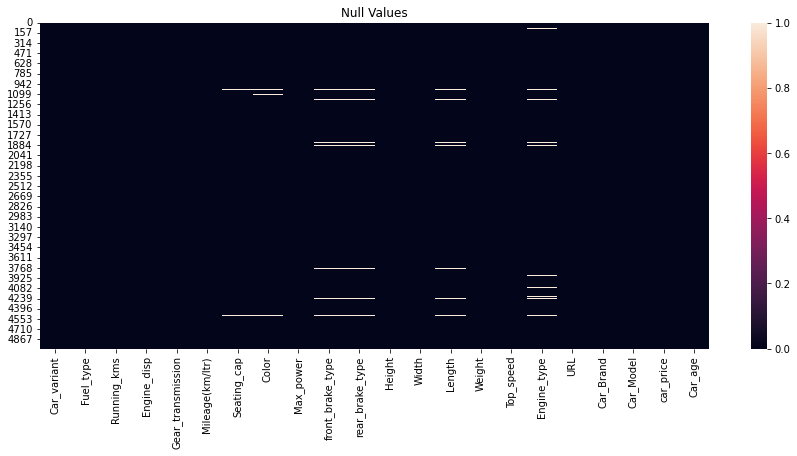

In [224]:
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

We can see there are some nan values are present in the dataset.we have to replace the nan values in continuous columns by there mean and categorical columns with it's mode.

In [ ]:
#Replacing nan values
for col in ['Engine_disp','Mileage(km/ltr)','Max_power','Height','Width','Weight','Top_speed']:
    df[col] = df[col].fillna(df[col].median())
for col in ['Length']:
    df[col] = df[col].fillna(df[col].mean())


In [225]:
for col1 in ['Seating_cap','Color','front_brake_type','rear_brake_type','Engine_type','Length']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

In [227]:
df.isnull().sum()

Car_variant          0
Fuel_type            0
Running_kms          0
Engine_disp          0
Gear_transmission    0
Mileage(km/ltr)      0
Seating_cap          0
Color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
Height               0
Width                0
Length               0
Weight               0
Top_speed            0
Engine_type          0
URL                  0
Car_Brand            0
Car_Model            0
car_price            0
Car_age              0
dtype: int64

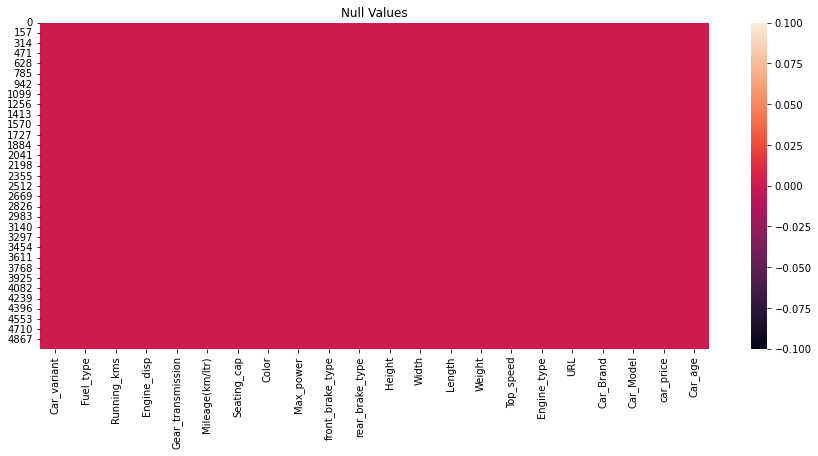

In [226]:
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Now we can see there is no null values are present inside our dataset

In [136]:
df.columns

Index(['Car_variant', 'Fuel_type', 'Running_kms', 'Engine_disp',
       'Gear_transmission', 'Mileage(km/ltr)', 'Seating_cap', 'Color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'Height', 'Width',
       'Length', 'Weight', 'Top_speed', 'Torque', 'Engine_type', 'URL',
       'Manu_year', 'Car_Brand', 'Car_Model', 'car_price'],
      dtype='object')

In [228]:
df.head()

Car_variant Fuel_type  Running_kms  Engine_disp Gear_transmission  \
0      Sportz 1.2    Petrol      39683.0       1197.0            Manual   
1         M4 8Str    Diesel      37222.0       1497.0            Manual   
2          W8 FWD    Diesel      90281.0       2179.0            Manual   
3  Petrol RXS CVT    Petrol      33139.0       1498.0         Automatic   
4  Petrol RXS CVT    Petrol      31525.0       1498.0         Automatic   

   Mileage(km/ltr)  Seating_cap      Color  Max_power     front_brake_type  \
0            18.50          5.0       Blue      82.85                 Disc   
1            17.30          8.0      Black     121.00                 Disc   
2            15.10          7.0      White     140.00  Disc & Caliper Type   
3            14.99          5.0     Silver     104.50                 Disc   
4            14.99          5.0  Fiery Red     104.50                 Disc   

   ...  Width  Length  Weight Top_speed                  Engine_type  \
0  ...   1710    3995  1690.0     172.0     Kappa VTVT Petrol Engine   
1  ...  1866    4585   1690.0     172.0  D15 1.5 Liter Diesel Engine   
2  ...   1890    4585  2450.0     175.0          mHawk Diesel Engine   
3  ...   1822    4315  1770.0     160.0            H4K Petrol Engine   
4  ...   1822    4315  1770.0     160.0            H4K Petrol Engine   

                                                 URL Car_Brand Car_Model  \
0  https://www.cardekho.com/buy-used-car-details/...   Hyundai       i20   
1  https://www.cardekho.com/buy-used-car-details/...  Mahindra   Marazzo   
2  https://www.cardekho.com/buy-used-car-details/...  Mahindra    XUV500   
3  https://www.cardekho.com/buy-used-car-details/...   Renault    Duster   
4  https://www.cardekho.com/buy-used-car-details/...   Renault    Duster   

  car_price Car_age  
0      3.75     8.0  
1      8.79     4.0  
2      8.27     7.0  
3      7.10     4.0  
4      7.50     5.0  

[5 rows x 22 columns]

In [233]:
#Checking description of data set
df.describe()

Running_kms  Engine_disp  Mileage(km/ltr)  Seating_cap    Max_power  \
count  5.010000e+03  5010.000000      5010.000000  5010.000000  5010.000000   
mean   5.751188e+04  1549.731936        18.474209     5.286627   120.449727   
std    4.929044e+04   523.888845         3.997804     0.774984   259.833250   
min    2.900000e+02     0.000000         7.080000     2.000000    13.000000   
25%    3.194600e+04  1197.000000        16.000000     5.000000    81.860000   
50%    5.300000e+04  1461.000000        18.400000     5.000000   100.000000   
75%    7.500000e+04  1950.000000        20.730000     5.000000   136.000000   
max    1.850000e+06  4461.000000       110.000000    10.000000  9066.000000   

            Height       Weight    Top_speed     car_price      Car_age  
count  5010.000000  5010.000000  5010.000000  5.010000e+03  5010.000000  
mean   4193.503792  1755.558084   175.436327  2.378381e+04     6.565269  
std     408.259391   343.287978    21.888929  5.533270e+05     3.689191  
min    2752.000000   771.000000    70.000000  1.000000e+00     0.000000  
25%    3955.000000  1690.000000   165.000000  4.200000e+00     4.000000  
50%    4265.000000  1690.000000   172.000000  6.710000e+00     6.000000  
75%    4490.000000  1690.000000   180.000000  1.219500e+01     9.000000  
max    5462.000000  3350.000000   275.000000  1.720000e+07    29.000000

# Find catagorical & numerical data:-

In [234]:
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Car_variant', 'Fuel_type', 'Gear_transmission', 'Color', 'front_brake_type', 'rear_brake_type', 'Width', 'Length', 'Engine_type', 'URL', 'Car_Brand', 'Car_Model']


We can see above are the list of categorical columns.

In [235]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Running_kms', 'Engine_disp', 'Mileage(km/ltr)', 'Seating_cap', 'Max_power', 'Height', 'Weight', 'Top_speed', 'car_price', 'Car_age']


we can see above are the list of numerical columns.

# Data Visualization:-

# Univariate Analysis:-

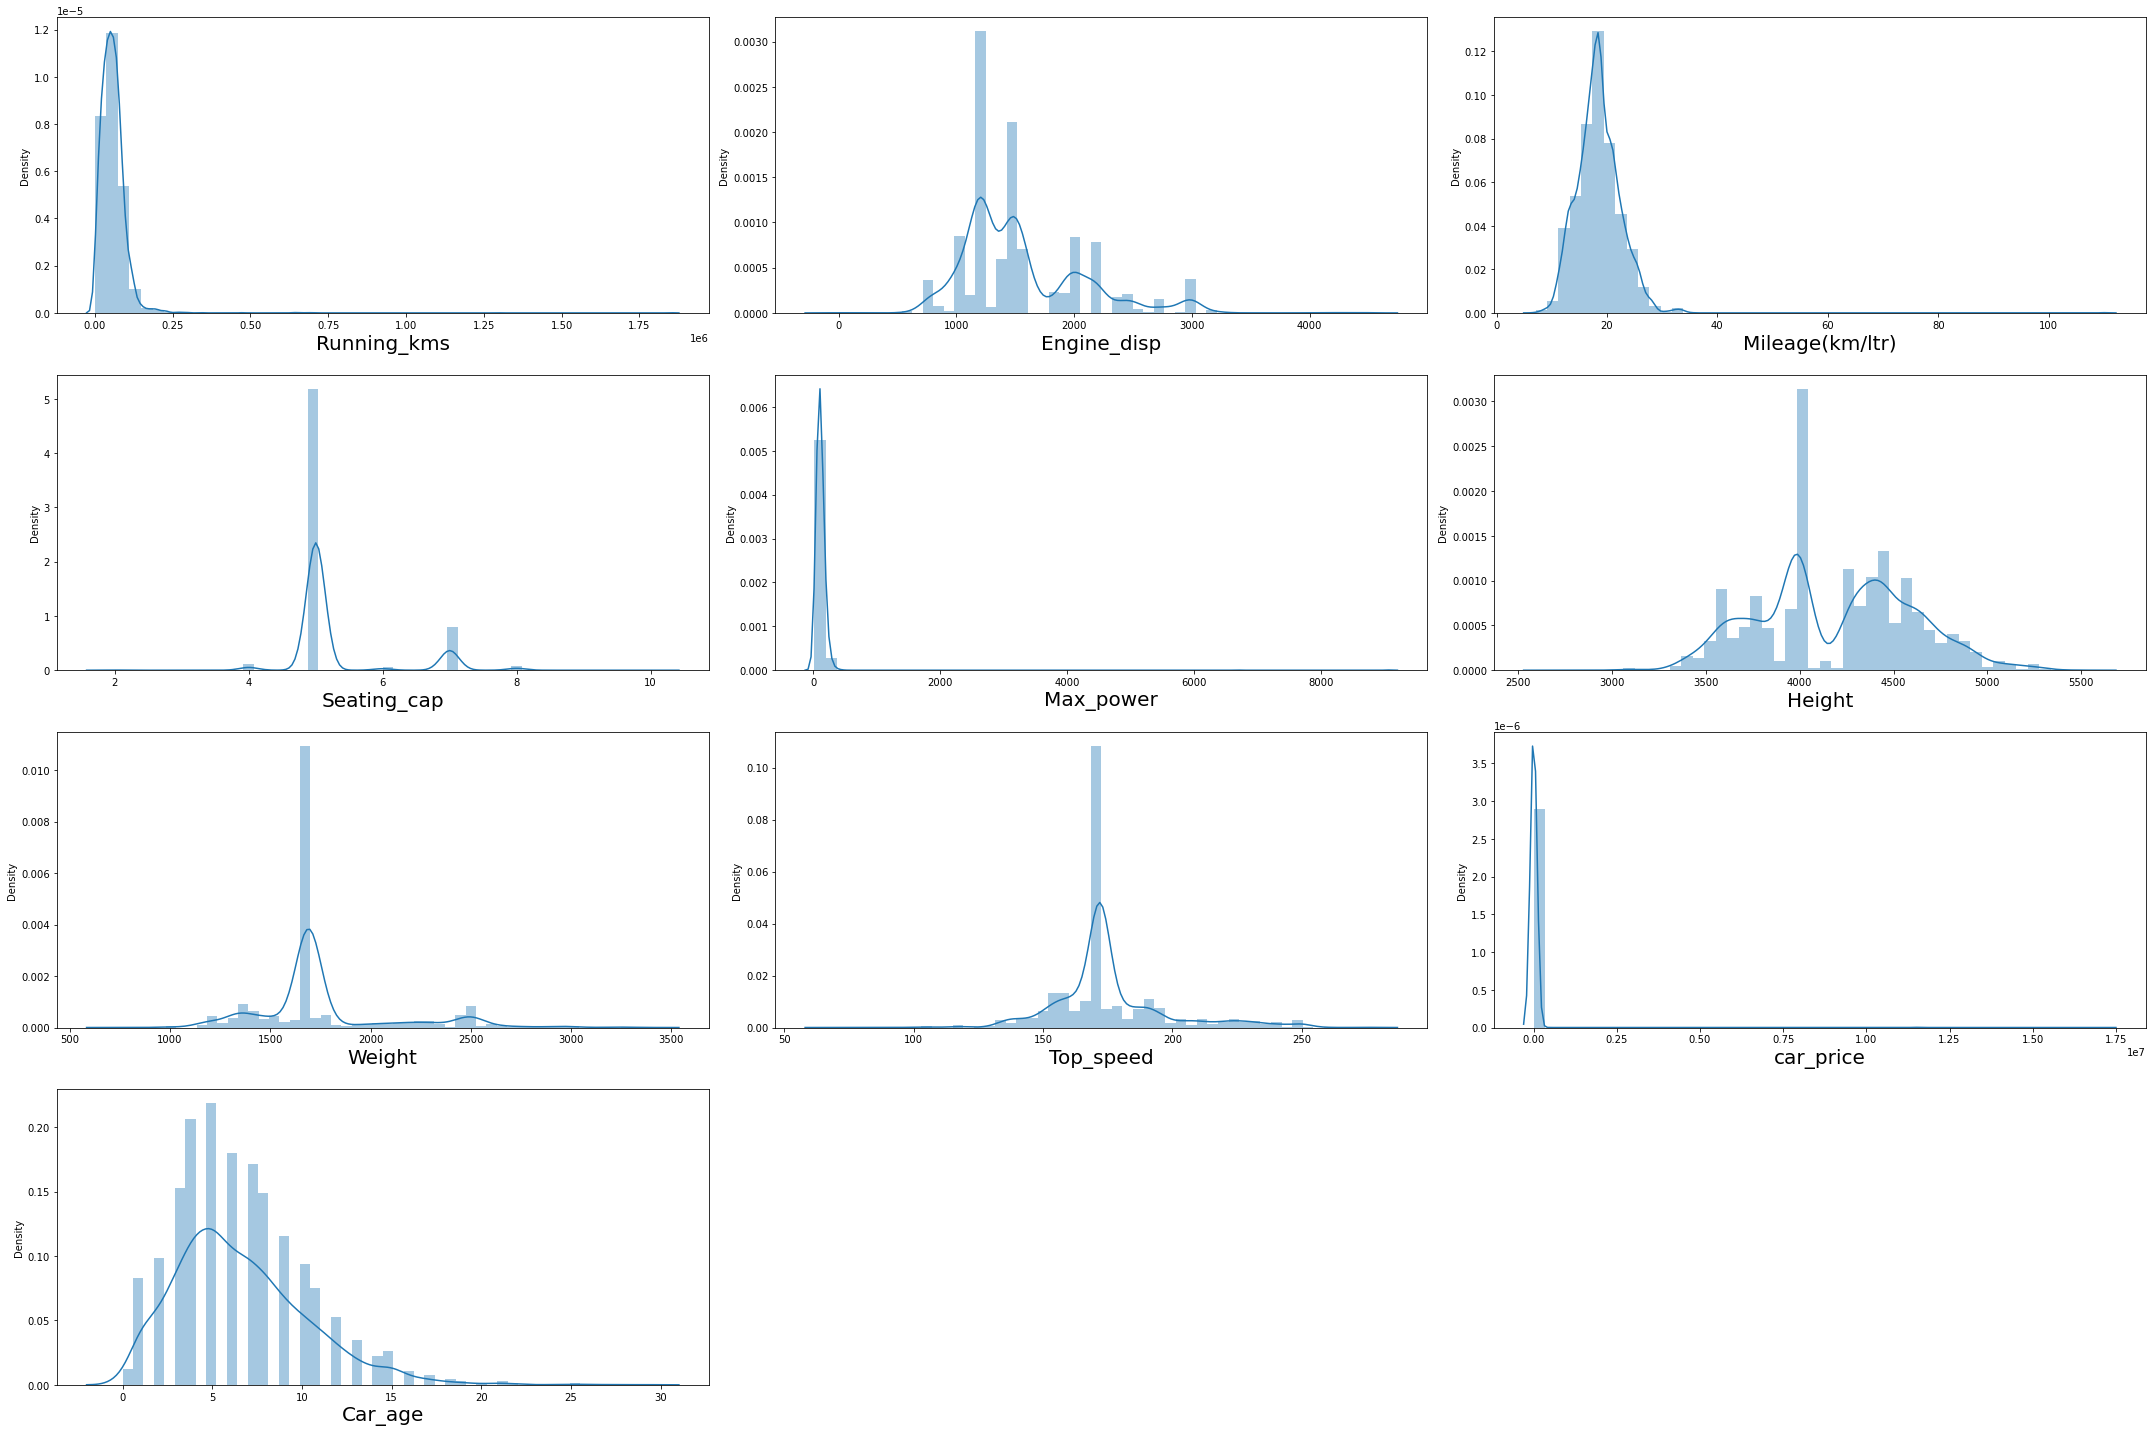

In [236]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,20))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

There is some skewness present in our dataset

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Petrol'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'CNG'),
  Text(3, 0, 'LPG'),
  Text(4, 0, 'Electric')])

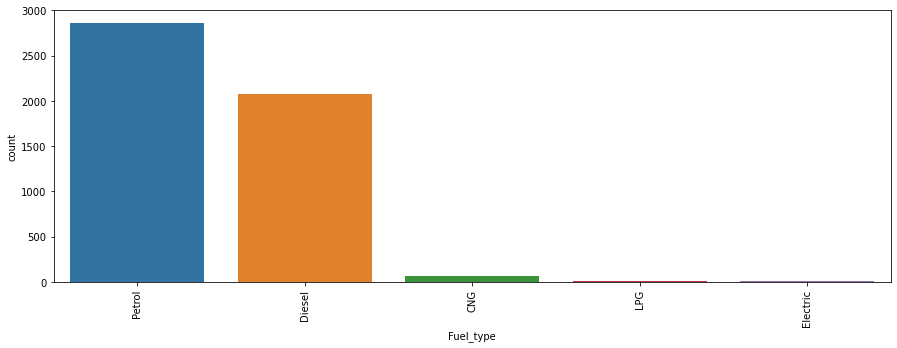

In [237]:
plt.figure(figsize=[15,5])
sns.countplot(df['Fuel_type'])
plt.xticks(rotation=90)

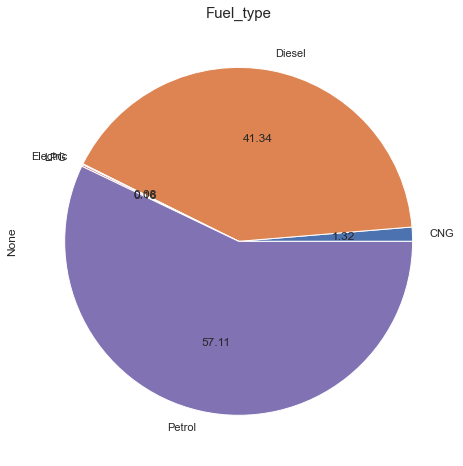

In [238]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
df.groupby("Fuel_type").size().plot(kind='pie', autopct='%.2f')
plt.title("Fuel_type", fontsize=15)
plt.show()

we can see that most cars are petrol and diesel driven

Manual       3508
Automatic    1502
Name: Gear_transmission, dtype: int64


(array([0, 1]), [Text(0, 0, 'Manual'), Text(1, 0, 'Automatic')])

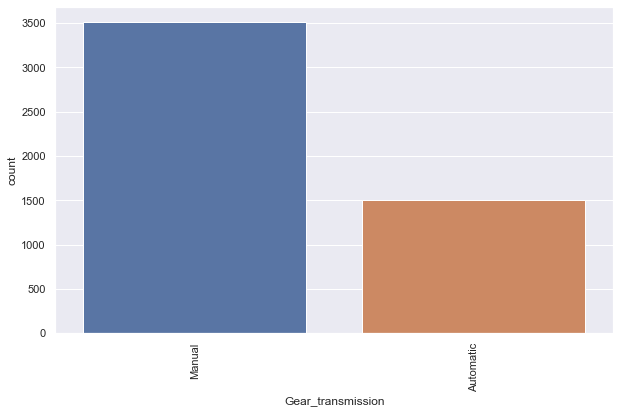

In [241]:
#Count plot for Gear_transmission column
plt.figure(figsize=[10,6])
print(df['Gear_transmission'].value_counts())  
sns.countplot(df['Gear_transmission'])
plt.xticks(rotation=90)

Maximum cars are with Manual gear transmission as compared to Automatic

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Disc'),
  Text(1, 0, 'Disc & Caliper Type'),
  Text(2, 0, 'Ventilated Disc'),
  Text(3, 0, 'ventilated disc'),
  Text(4, 0, 'Multilateral Disc'),
  Text(5, 0, 'Drum'),
  Text(6, 0, 'M Sport Brakes'),
  Text(7, 0, 'Disc & Drum'),
  Text(8, 0, 'Vacuum assisted hydraulic dual circuit w')])

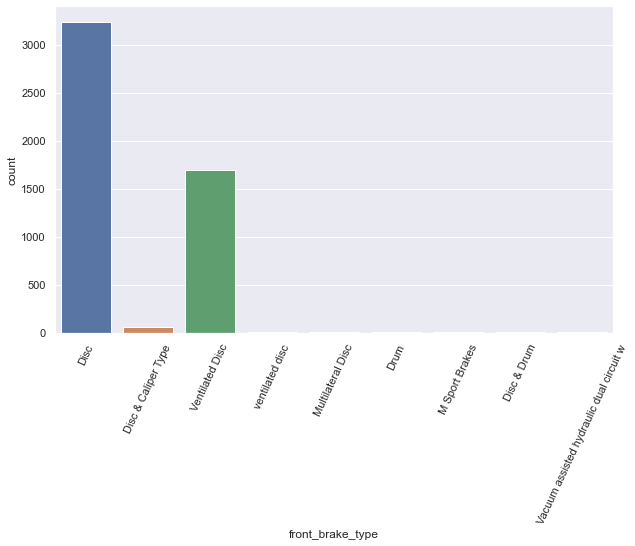

In [242]:
#Count plot for front_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['front_brake_type'])
plt.xticks(rotation=65)

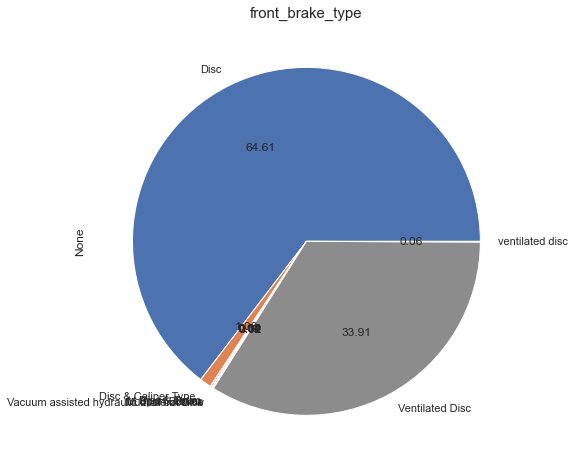

In [243]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
df.groupby('front_brake_type').size().plot(kind='pie', autopct='%.2f')
plt.title('front_brake_type', fontsize=15)
plt.show()

here we can see Disc front brake cars are more in number followed by Ventilated Disc.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Drum'),
  Text(1, 0, 'Disc'),
  Text(2, 0, 'Disc & Caliper Type'),
  Text(3, 0, 'Ventilated Disc'),
  Text(4, 0, 'Leading-Trailing Drum'),
  Text(5, 0, 'ventilated disc'),
  Text(6, 0, 'Self-Adjusting Drum'),
  Text(7, 0, 'self adjusting drums'),
  Text(8, 0, 'Disc & Drum'),
  Text(9, 0, 'Ventilated Drum'),
  Text(10, 0, 'Booster assisted drum'),
  Text(11, 0, 'M Sport Brakes'),
  Text(12, 0, 'Ventilated Drum In Discs'),
  Text(13, 0, 'Vacuum assisted hydraulic dual circuit w')])

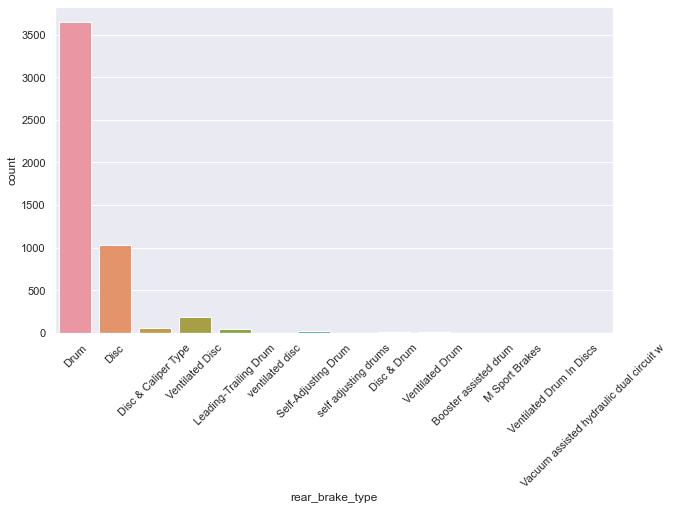

In [245]:
#Count plot for rear_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['rear_brake_type'])
plt.xticks(rotation=45)

Drum rare break cars are more in number.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Hyundai'),
  Text(1, 0, 'Mahindra'),
  Text(2, 0, 'Renault'),
  Text(3, 0, 'Maruti'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Jeep'),
  Text(6, 0, 'Nissan'),
  Text(7, 0, 'Kia'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Volkswagen'),
  Text(10, 0, 'Toyota'),
  Text(11, 0, 'Datsun'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Skoda'),
  Text(14, 0, 'Chevrolet'),
  Text(15, 0, 'Land'),
  Text(16, 0, 'Ford'),
  Text(17, 0, 'Mercedes-Benz'),
  Text(18, 0, 'Audi'),
  Text(19, 0, 'Jaguar'),
  Text(20, 0, 'Fiat'),
  Text(21, 0, 'BMW'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'Porsche'),
  Text(24, 0, 'Isuzu'),
  Text(25, 0, 'Mini'),
  Text(26, 0, 'Mitsubishi'),
  Text(27, 0, 'OpelCorsa'),
  Text(28, 0, 'Bajaj'),
  Text(29, 0, 'Lexus')])

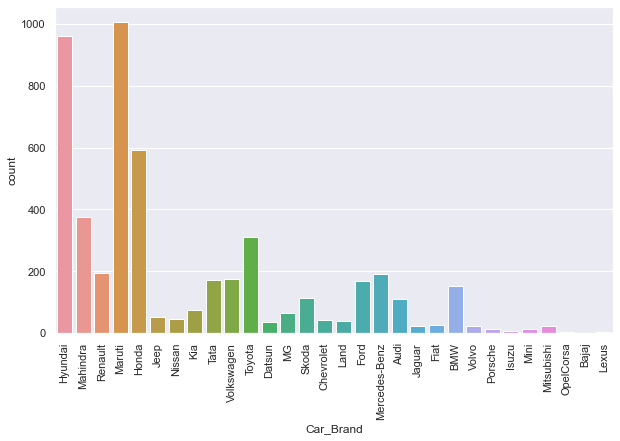

In [249]:
#Count plot for Car_Brand column
plt.figure(figsize=[10,6])
sns.countplot(df['Car_Brand'])
plt.xticks(rotation=90)

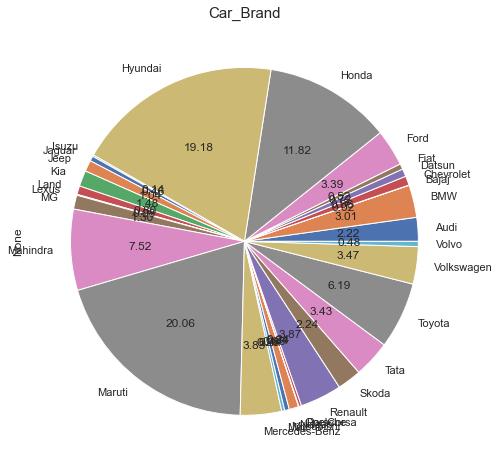

In [250]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
df.groupby('Car_Brand').size().plot(kind='pie', autopct='%.2f')
plt.title('Car_Brand', fontsize=15)
plt.show()

Here we can see Maximum cars under sale are Maruti followed by Hyundai and Honda

# Bivariate Analysis:-

In [268]:
col=['Running_kms', 'Engine_disp', 'Mileage(km/ltr)', 'Seating_cap', 'Max_power', 'Height', 'Weight', 'Top_speed', 'Car_age']

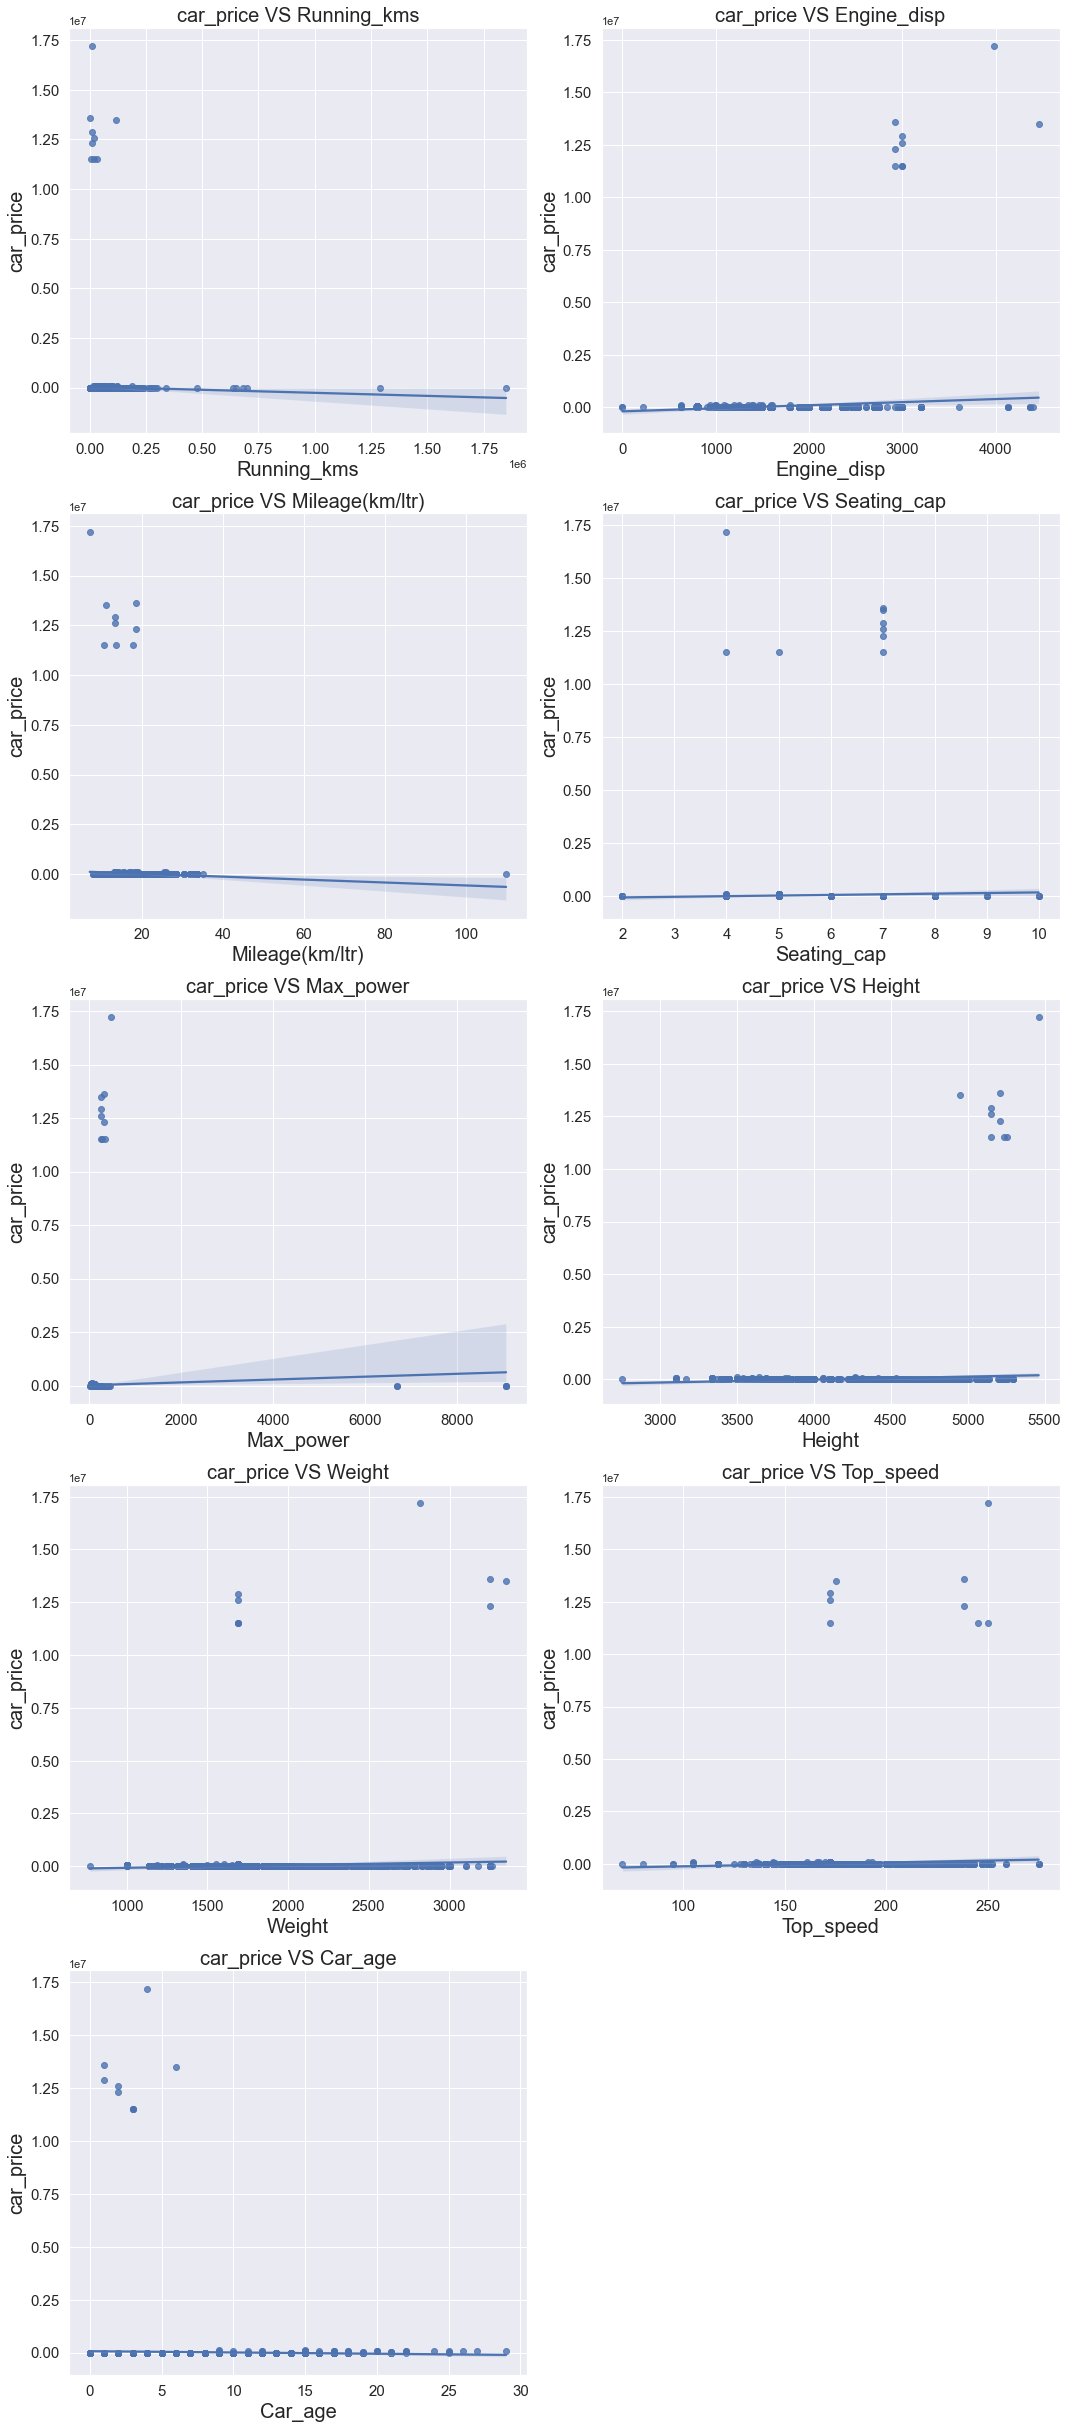

In [277]:
plt.figure(figsize=(15,40))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['car_price'],color="b")
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

- Maximum cars are having below 25k driven kms. And car price is high for less driven cars.
- Maximum cars are having 1000-3000 Endine_disp. And car price is high for 3000 Endine_disp.
- Maximum cars are having milage of 10-25kms. And ,milage has no proper relation with car price.
- car price is incresing he the seat capacity is more than 5
- As Max_power is increasing car price is also increasing.
- Car_price has no proper relation with height.
- As the width is increasing car price is also increasing.
- As length is increasing car price is also increasing.
- Weight also has linear relationship with car price.
- As top_speed is increasing car price is also increasing.
- Car price is high if the car age is below 5-10

In [282]:
col2=['Fuel_type', 'Gear_transmission', 'front_brake_type', 'rear_brake_type', 'Car_Brand']

In [283]:
plt.figure(figsize=(20,30))
for i in range(len(col2)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['car_price'],x=df[col2[i]])
    plt.title(f"car_price VS {col2[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(col2[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

In [285]:
#pair plot

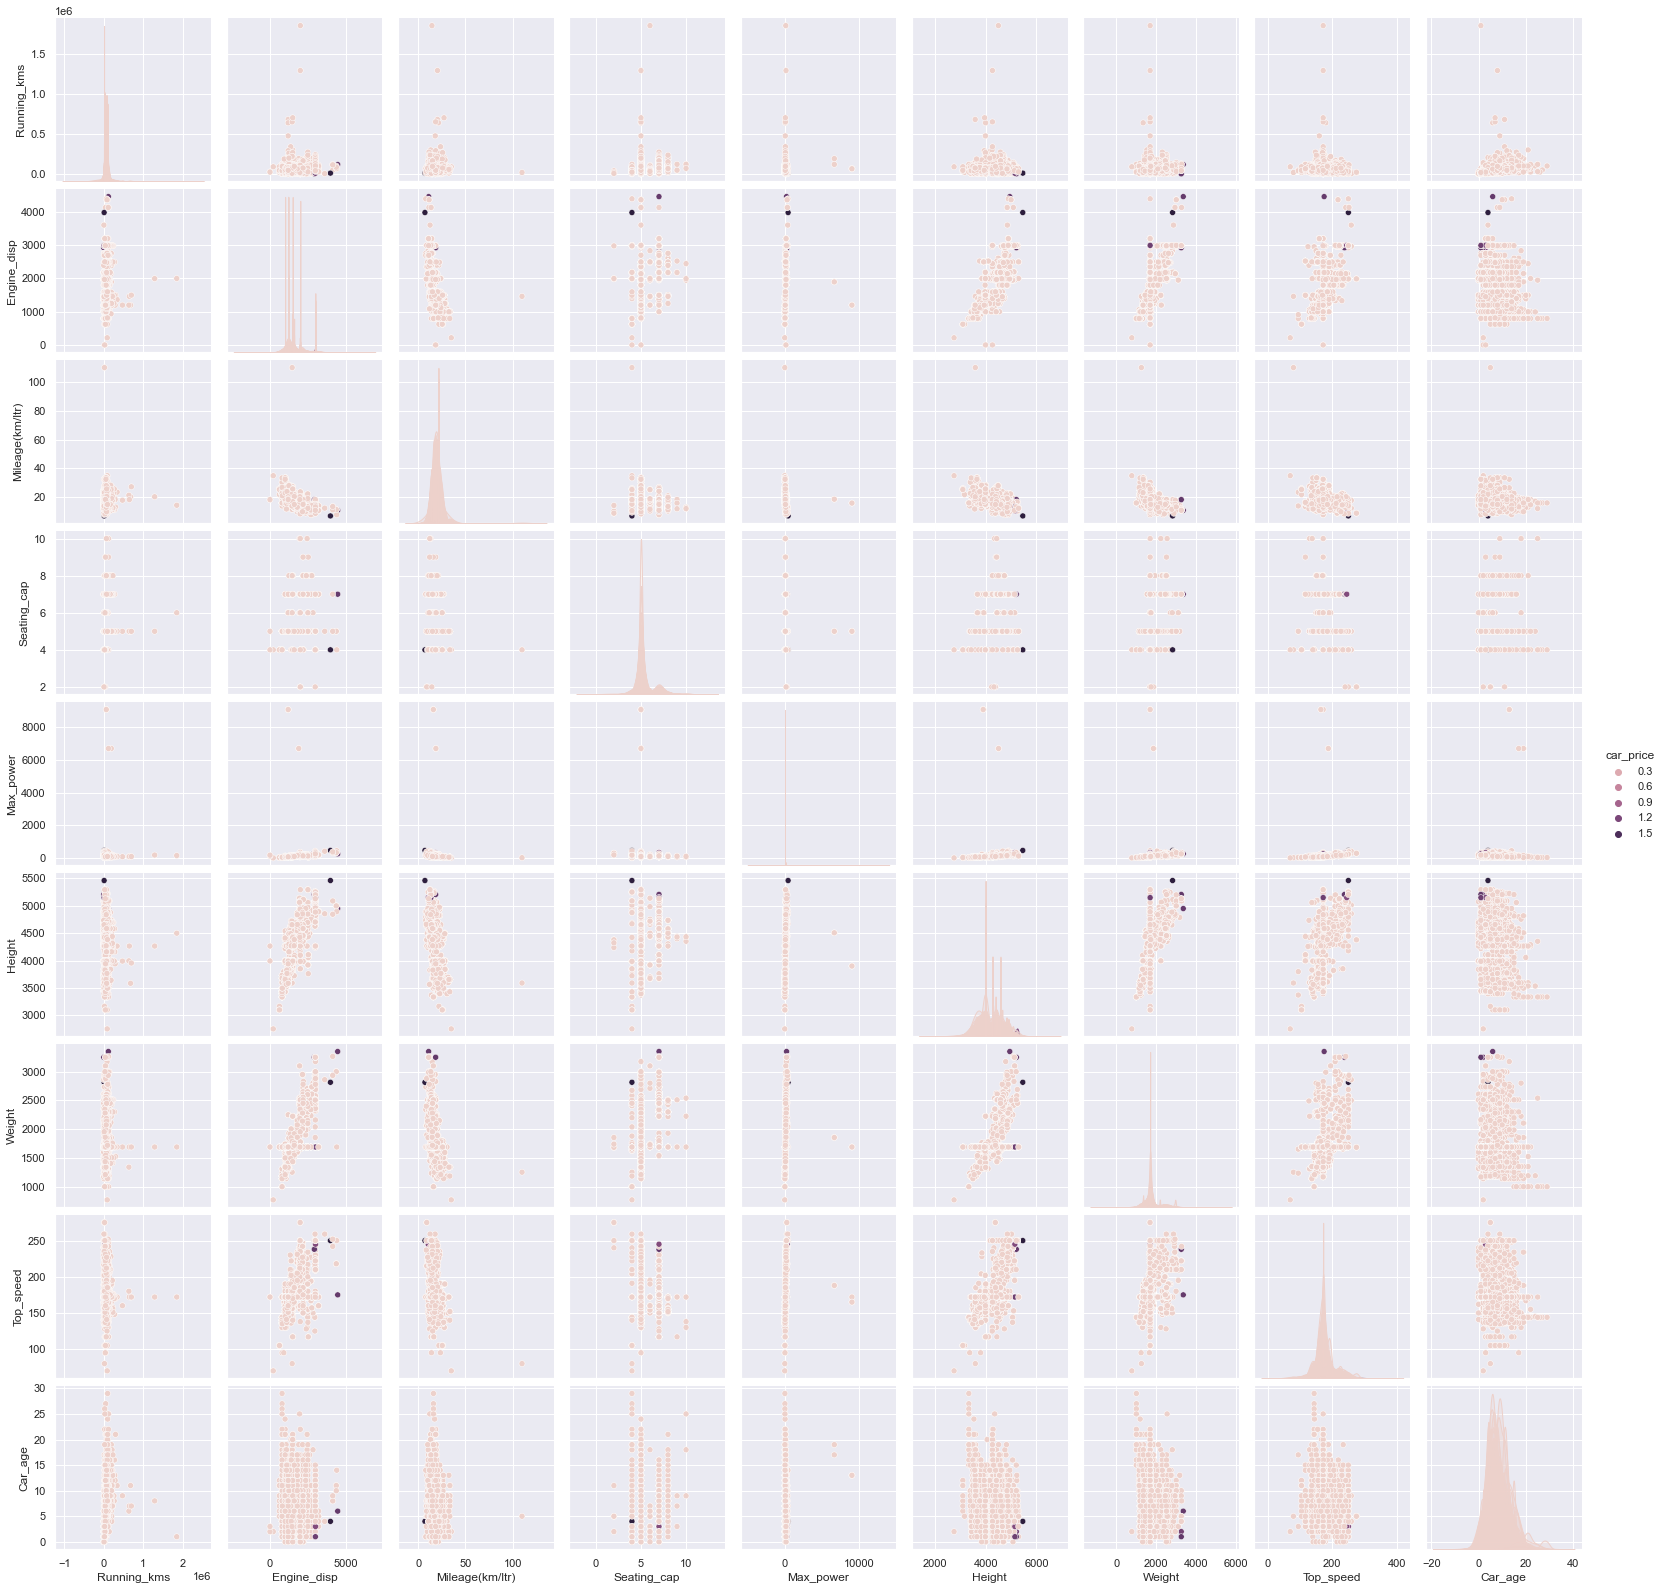

In [284]:
sns.pairplot(df,hue="car_price")

# Checking for outliers:-

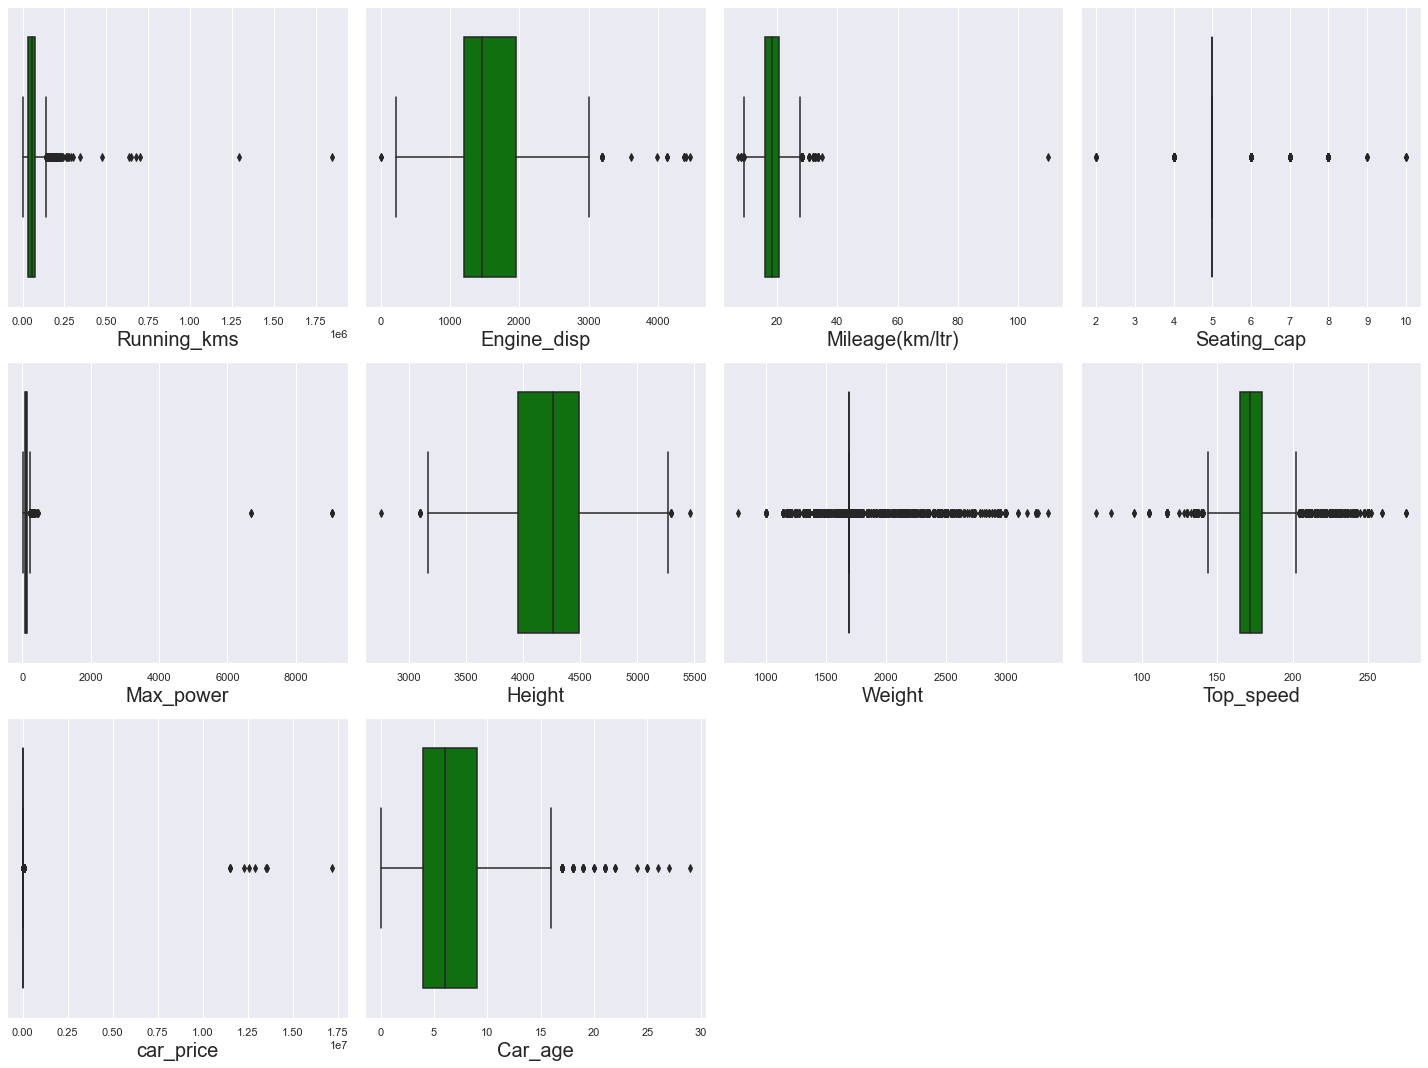

In [286]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

As we can see there are outliers in all columns. Since car_price is our target we should not remove outliers from it.

# Removing outliers:-

# Zscore Method:-

In [289]:
features=df[['Running_kms', 'Engine_disp', 'Mileage(km/ltr)', 'Seating_cap', 'Max_power', 'Height', 'Weight', 'Top_speed', 'Car_age']]

In [290]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

Car_variant Fuel_type  Running_kms  Engine_disp Gear_transmission  \
0          Sportz 1.2    Petrol      39683.0       1197.0            Manual   
2              W8 FWD    Diesel      90281.0       2179.0            Manual   
3      Petrol RXS CVT    Petrol      33139.0       1498.0         Automatic   
4      Petrol RXS CVT    Petrol      31525.0       1498.0         Automatic   
5  VTVT 1.6 SX Option    Petrol      54195.0       1591.0            Manual   

   Mileage(km/ltr)  Seating_cap      Color  Max_power     front_brake_type  \
0            18.50          5.0       Blue      82.85                 Disc   
2            15.10          7.0      White     140.00  Disc & Caliper Type   
3            14.99          5.0     Silver     104.50                 Disc   
4            14.99          5.0  Fiery Red     104.50                 Disc   
5            17.00          5.0      White     121.30                 Disc   

   ... Width  Length  Weight Top_speed               Engine_type  \
0  ...  1710    3995  1690.0     172.0  Kappa VTVT Petrol Engine   
2  ...  1890    4585  2450.0     175.0       mHawk Diesel Engine   
3  ...  1822    4315  1770.0     160.0         H4K Petrol Engine   
4  ...  1822    4315  1770.0     160.0         H4K Petrol Engine   
5  ...  1729    4440  1690.0     172.0        VTVT Petrol Engine   

                                                 URL Car_Brand Car_Model  \
0  https://www.cardekho.com/buy-used-car-details/...   Hyundai       i20   
2  https://www.cardekho.com/buy-used-car-details/...  Mahindra    XUV500   
3  https://www.cardekho.com/buy-used-car-details/...   Renault    Duster   
4  https://www.cardekho.com/buy-used-car-details/...   Renault    Duster   
5  https://www.cardekho.com/buy-used-car-details/...   Hyundai     Verna   

  car_price Car_age  
0      3.75     8.0  
2      8.27     7.0  
3      7.10     4.0  
4      7.50     5.0  
5     10.00     4.0  

[5 rows x 22 columns]

In [291]:
#Checking shape of new dataset
df_new.shape

(4684, 22)

In my new dataset i have 4684 rows and 22 columns.

In [292]:
#Checking shape of old dataset
df.shape

(5010, 22)

# % of dataloss:-

In [293]:
#Checking dataloss in zscore method
Dataloss = (((5010-4684)/5010)*100)
Dataloss

6.506986027944111

In Z-score method the data loss is less than 10% still let me have a look into IQR method to remove outliers.

# ii) IQR method:-

In [294]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of the dataset using IQR method.

In [295]:
#Checking shape of new dataset
df_1.shape

(2108, 22)

In my new dataset i have 2108 rows and 22 columns.

In [296]:
#Checking shape of old dataset
df.shape

(5010, 22)

In [297]:
#Checking dataloss in IQR method of the dataset
Dataloss = (((5010-2108)/5010)*100)
Dataloss

57.924151696606785

Here In IQR method the data loss is more than 10% so let me stick on to Z-score method itself.

# Checking for skewness:-

In [299]:
num_columns=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]!='object':
        num_columns.append(i)
print(num_columns)

['Running_kms', 'Engine_disp', 'Mileage(km/ltr)', 'Seating_cap', 'Max_power', 'Height', 'Weight', 'Top_speed', 'car_price', 'Car_age']


In [300]:
#Checking for skewness in the dataset
df_new[num_columns].skew()

Running_kms         0.845599
Engine_disp         1.090598
Mileage(km/ltr)     0.217652
Seating_cap         2.014050
Max_power           1.196741
Height              0.054410
Weight              1.237325
Top_speed           0.943129
car_price          39.613569
Car_age             0.613281
dtype: float64

-Here I can notice there is skewness in all the numerical columns except Milage_in_km/ltr and Car_age. So we have to remove this skewness. Since car_price is my target no need to remove skewness in this column.

# Removing skewness using yeo-johnson method:-

In [305]:
fea=['Running_kms', 'Engine_disp', 'Seating_cap', 'Max_power', 'Height', 'Weight', 'Top_speed']

Taking a list as fea with all the columns with skewness.

In [306]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

Using yeo_johnson method i am removing the skewness.

In [307]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

Got removed from skewness.

In [308]:
#Checking skewness again
df_new[fea].skew()

Running_kms   -0.032833
Engine_disp    0.227804
Seating_cap   -0.631493
Max_power      0.008214
Height        -0.014921
Weight        -0.051081
Top_speed     -0.049506
dtype: float64

In all the columns skewness has reduced.

# Label Encoding:-

In [315]:
df_new.dtypes

Car_variant           object
Fuel_type             object
Running_kms          float64
Engine_disp          float64
Gear_transmission     object
Mileage(km/ltr)      float64
Seating_cap          float64
Color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
Height               float64
Width                 object
Length                object
Weight               float64
Top_speed            float64
Engine_type           object
URL                   object
Car_Brand             object
Car_Model             object
car_price            float64
Car_age              float64
dtype: object

These are the list of categorical columns in df_new.

In [318]:
cat_col=['Fuel_type', 'Gear_transmission', 'Color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model']

In [319]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [320]:
df_new[cat_col].head()

Fuel_type  Gear_transmission  Color  front_brake_type  rear_brake_type  \
0          4                  1     25                 0                4   
2          1                  1    218                 1                2   
3          4                  0    176                 0                4   
4          4                  0     70                 0                4   
5          4                  1    218                 0                4   

   Car_Brand  Car_Model  
0          7        243  
2         15        233  
3         23         68  
4         23         68  
5          7        215

Here Using label encoder i have encoded the categorical columns.


# Checking correlation using heat map:-

In [321]:
cor=df_new.corr()
cor

Fuel_type  Running_kms  Engine_disp  Gear_transmission  \
Fuel_type           1.000000    -0.279134    -0.528766           0.088530   
Running_kms        -0.279134     1.000000     0.155759           0.135661   
Engine_disp        -0.528766     0.155759     1.000000          -0.362849   
Gear_transmission   0.088530     0.135661    -0.362849           1.000000   
Mileage(km/ltr)    -0.082266    -0.021021    -0.593779           0.313886   
Seating_cap        -0.275500     0.186655     0.339323           0.033739   
Color              -0.050420     0.024764     0.026791           0.004927   
Max_power          -0.358875    -0.019109     0.824409          -0.512779   
front_brake_type   -0.080110     0.188905     0.104253           0.011108   
rear_brake_type     0.049445     0.062504    -0.147540           0.169352   
Height             -0.407730     0.084430     0.801474          -0.406083   
Weight             -0.450142     0.136594     0.677175          -0.226442   
Top_speed          -0.187852    -0.001266     0.465930          -0.406687   
Car_Brand          -0.093976     0.048133     0.072430           0.056838   
Car_Model          -0.062767     0.025906    -0.006119           0.088930   
car_price          -0.030002    -0.042273     0.068164          -0.039534   
Car_age             0.009668     0.603627    -0.005484           0.190641   

                   Mileage(km/ltr)  Seating_cap     Color  Max_power  \
Fuel_type                -0.082266    -0.275500 -0.050420  -0.358875   
Running_kms              -0.021021     0.186655  0.024764  -0.019109   
Engine_disp              -0.593779     0.339323  0.026791   0.824409   
Gear_transmission         0.313886     0.033739  0.004927  -0.512779   
Mileage(km/ltr)           1.000000    -0.247005 -0.007722  -0.593127   
Seating_cap              -0.247005     1.000000  0.070490   0.166088   
Color                    -0.007722     0.070490  1.000000   0.006393   
Max_power                -0.593127     0.166088  0.006393   1.000000   
front_brake_type         -0.026246     0.081352  0.005983   0.000380   
rear_brake_type           0.140990     0.000346 -0.040877  -0.258400   
Height                   -0.534743     0.297475  0.007751   0.858866   
Weight                   -0.495168     0.420730  0.050440   0.613478   
Top_speed                -0.270983    -0.081627 -0.019529   0.664982   
Car_Brand                -0.046811     0.196839  0.004717  -0.066713   
Car_Model                -0.014889     0.085789  0.034954  -0.016392   
car_price                -0.028325    -0.005845 -0.019403   0.061165   
Car_age                  -0.115172     0.021437 -0.021359  -0.156666   

                   front_brake_type  rear_brake_type    Height    Weight  \
Fuel_type                 -0.080110         0.049445 -0.407730 -0.450142   
Running_kms                0.188905         0.062504  0.084430  0.136594   
Engine_disp                0.104253        -0.147540  0.801474  0.677175   
Gear_transmission          0.011108         0.169352 -0.406083 -0.226442   
Mileage(km/ltr)           -0.026246         0.140990 -0.534743 -0.495168   
Seating_cap                0.081352         0.000346  0.297475  0.420730   
Color                      0.005983        -0.040877  0.007751  0.050440   
Max_power                  0.000380        -0.258400  0.858866  0.613478   
front_brake_type           1.000000         0.233425  0.051688 -0.029997   
rear_brake_type            0.233425         1.000000 -0.220138 -0.091766   
Height                     0.051688        -0.220138  1.000000  0.586767   
Weight                    -0.029997        -0.091766  0.586767  1.000000   
Top_speed                  0.060471        -0.211271  0.582497  0.323774   
Car_Brand                  0.039578        -0.015371  0.064417  0.041828   
Car_Model                 -0.011750        -0.063927 -0.108274  0.154541   
car_price                 -0.017893        -0.025713  0.062803 -0.000077   
Car_age                    0.252833        

<AxesSubplot:>

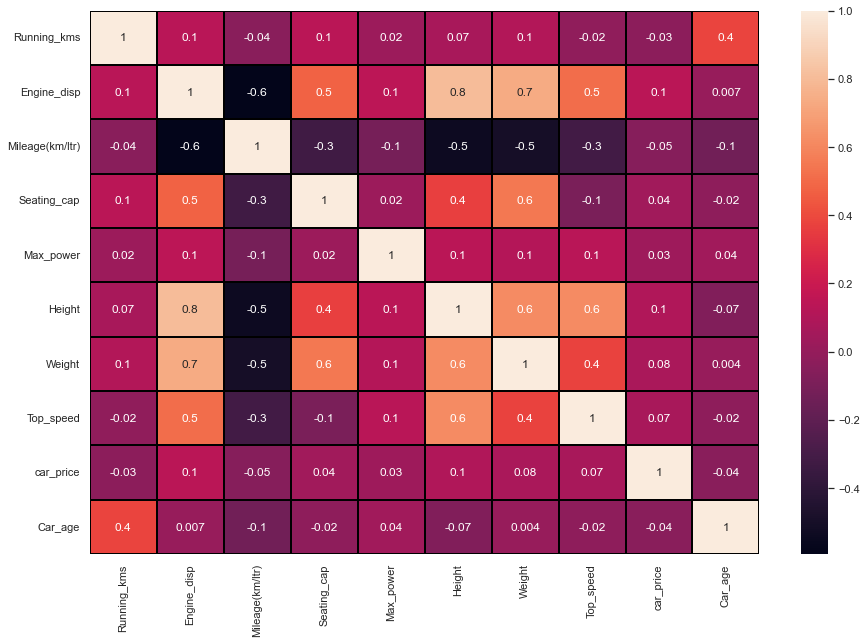

In [325]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.01,linecolor='black',fmt='.1g')

Here we can see I can notice there is multicolinearity issue in the dataset. So we have to use VIF to remove multicolinearity.

# Checking coorelation in barplot:-

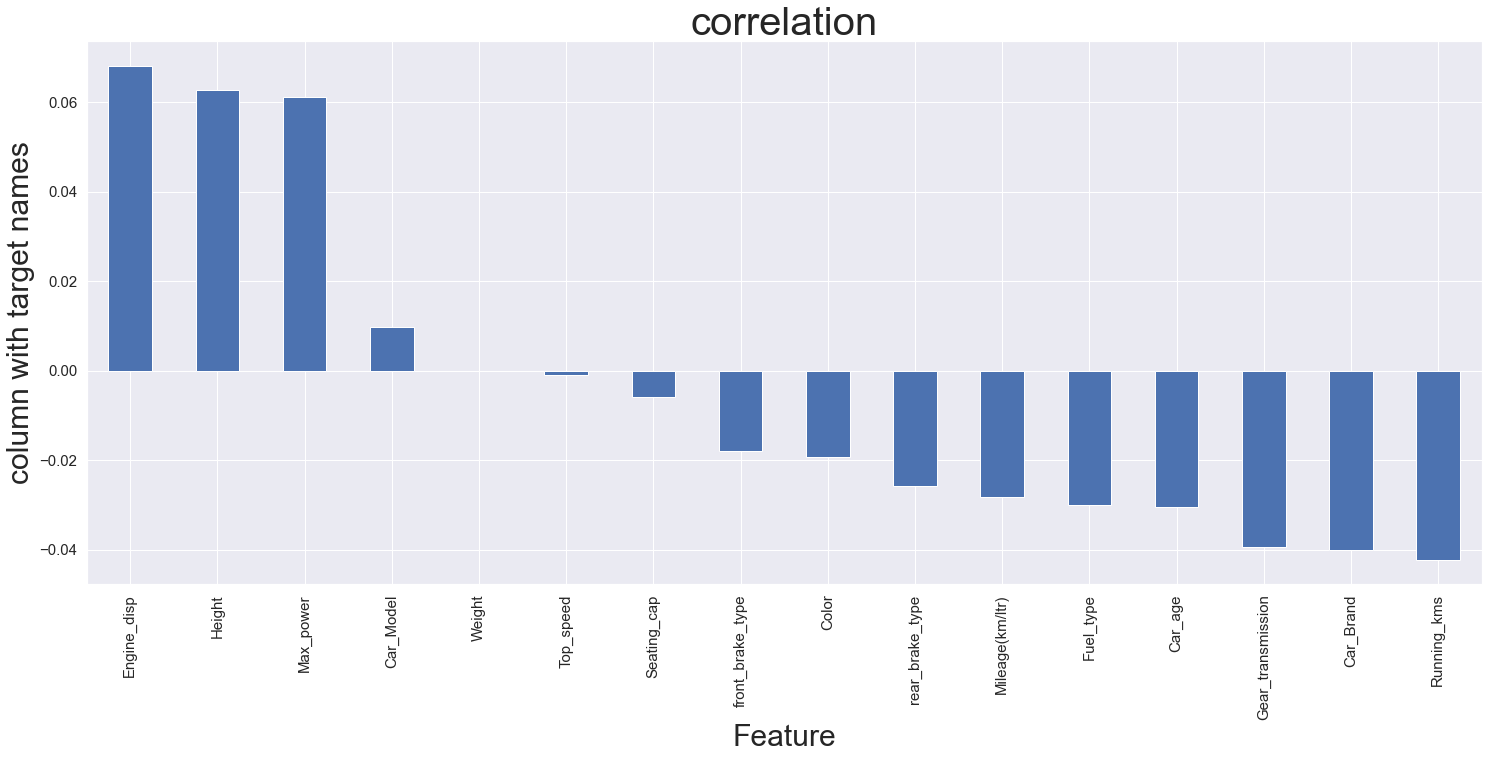

In [326]:
plt.figure(figsize=(25,10))
df_new.corr()['car_price'].sort_values(ascending=False).drop(['car_price']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

# Separating Features and Target:-

In [335]:
df_new.columns

Index(['Fuel_type', 'Running_kms', 'Engine_disp', 'Gear_transmission',
       'Mileage(km/ltr)', 'Seating_cap', 'Color', 'Max_power',
       'front_brake_type', 'rear_brake_type', 'Height', 'Width', 'Length',
       'Weight', 'Top_speed', 'Engine_type', 'URL', 'Car_Brand', 'Car_Model',
       'car_price', 'Car_age'],
      dtype='object')

In [331]:
df_new=df_new.drop("Car_variant",axis=1)

In [336]:
df_new=df_new.drop("Engine_type",axis=1)

In [339]:
df_new=df_new.drop("URL",axis=1)

In [340]:
x=df_new.drop("car_price",axis=1)
y=df_new["car_price"]

# Scaling the data using Standard scaler:-

In [341]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using Standard scaler.

In [342]:
X.head()

Fuel_type  Running_kms  Engine_disp  Gear_transmission  Mileage(km/ltr)  \
0   0.824944    -0.367895    -0.653567           0.631699        -0.030778   
1  -1.195996     1.114332     1.432769           0.631699        -0.994609   
2   0.824944    -0.613233     0.081267          -1.583031        -1.025791   
3   0.824944    -0.677052     0.081267          -1.583031        -1.025791   
4   0.824944     0.117651     0.287726           0.631699        -0.455997   

   Seating_cap     Color  Max_power  front_brake_type  rear_brake_type  \
0    -0.260375 -1.662637  -0.580430         -0.717864         0.269918   
1     2.118305  1.037377   0.931192         -0.363882        -0.985591   
2    -0.260375  0.449809   0.117507         -0.717864         0.269918   
3    -0.260375 -1.033100   0.117507         -0.717864         0.269918   
4    -0.260375  1.037377   0.541119         -0.717864         0.269918   

     Height     Width    Length    Weight  Top_speed  Car_Brand  Car_Model  \
0 -0.445171 -0.268481 -0.441617  0.008294  -0.028674  -0.800723   1.534068   
1  1.065265  1.196926  1.084710  1.989709   0.136612   0.243463   1.400035   
2  0.385024  0.643328  0.386221  0.292106  -0.743026   1.287649  -0.811505   
3  0.385024  0.643328  0.386221  0.292106  -0.743026   1.287649  -0.811505   
4  0.702142 -0.113799  0.709596  0.008294  -0.028674  -0.800723   1.158777   

    Car_age  
0  0.468589  
1  0.178339  
2 -0.692411  
3 -0.402161  
4 -0.692411

This is the data of independent variables after scaling.

# Checking for multicolinearity issue using VIF:-

In [346]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features           Features
0       2.626938          Fuel_type
1       1.874618        Running_kms
2       5.802667        Engine_disp
3       1.459727  Gear_transmission
4       3.015067    Mileage(km/ltr)
5       1.527720        Seating_cap
6       1.013981              Color
7       9.158805          Max_power
8       1.213156   front_brake_type
9       1.189899    rear_brake_type
10      3.677362              Width
11      5.222628             Length
12      2.437698             Weight
13      2.211098          Top_speed
14      1.184733          Car_Brand
15      1.172950          Car_Model
16      2.070367            Car_age

In [344]:
X = X.drop(["Height",],axis=1)

In [347]:
X = X.drop(["Max_power"],axis=1)

In [348]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features           Features
0       2.621209          Fuel_type
1       1.874313        Running_kms
2       5.050898        Engine_disp
3       1.416574  Gear_transmission
4       2.900054    Mileage(km/ltr)
5       1.485845        Seating_cap
6       1.013981              Color
7       1.211614   front_brake_type
8       1.177835    rear_brake_type
9       3.364186              Width
10      4.382488             Length
11      2.415418             Weight
12      1.981275          Top_speed
13      1.135032          Car_Brand
14      1.166803          Car_Model
15      2.010178            Car_age

Now the multicolinearity issue is solved.

# Finding Best Random State and Accuracy:-

In [349]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [351]:
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod=RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8749235065918727  on Random_state  75


In [352]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression algorithms

In [356]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:-

In [357]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)
#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 82.31159525049566
mean_squared_error: 20923617371.548107
mean_absolute_error: 4650.354800234286
root_mean_squared_error: 144649.98227289246

Cross validation score : -90727199.58418949

R2_Score - Cross Validation Score : 90727281.89578474


# ii)ExtraTreesRegressor:-

In [358]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(ETR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 94.58573380384581
mean_squared_error: 6404536522.108471
mean_absolute_error: 6096.247638869132
root_mean_squared_error: 80028.34824053581

Cross validation score : -6227257.630542369

R2_Score - Cross Validation Score : 6227352.216276173


# iii)GradientBoostingRegressor:-

In [359]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 99.66515072258734
mean_squared_error: 396093274.4892143
mean_absolute_error: 1067.2853622964576
root_mean_squared_error: 19902.092213865715

Cross validation score : -1611272.6871945537

R2_Score - Cross Validation Score : 1611372.3523452762


# iv)DecisionTreeRegressor:-

In [360]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 98.76843735393334
mean_squared_error: 1456815690.2963314
mean_absolute_error: 1729.93893314367
root_mean_squared_error: 38168.255007222055

Cross validation score : -7189283.806986359

R2_Score - Cross Validation Score : 7189382.575423713


# v) Bagging Regressor:-

In [361]:
BR=BaggingRegressor()
BR.fit(X_train,y_train)
pred=BR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(BR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 82.83276068199301
mean_squared_error: 20307130682.649036
mean_absolute_error: 4274.095240042673
root_mean_squared_error: 142503.09008105416

Cross validation score : -1599813.2056624251

R2_Score - Cross Validation Score : 1599896.0384231072


# Hyper parameter tunning for best model:-

In [362]:
from sklearn.model_selection import GridSearchCV

In [363]:
parameter = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'splitter':['best','random'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
             'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

Giving DecisionTreeRegressor parameters.


In [364]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=10)

In [ ]:
GCV.fit(X_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
#Its take too much tim to load..already it takes 3-4hrs for run...so i take best parameters from myself

In [367]:
Best_mod=DecisionTreeRegressor(criterion='friedman_mse',max_depth=15,max_features='auto',min_samples_split=4,splitter='random')
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 99.91381595930797
mean_squared_error: 101947118.26822177
mean_absolute_error: 677.5061018697173
RMSE value: 10096.886563105569


This is my model r2_score after tuning.I got 99.91% as r2_score which is gooddd!!!.Before model accuracy was 98% now after tunning it is 99.91%.

# Saving the model:-

In [368]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"used_Car_Price.pkl")

['used_Car_Price.pkl']

I have saved my model as Used_Car_Price Using .pkl

# Predictions:-

In [369]:
# Loading the saved model
model=joblib.load("Used_Car_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([3.89548387, 4.34923077, 5.66333333, ..., 9.41866667, 4.11809524,
       7.3       ])

In [370]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"]).T

Predicted  Actual
0      3.895484    3.81
1      4.349231    5.50
2      5.663333    4.90
3      8.316667   13.95
4      6.945479    4.75
...         ...     ...
1401   1.610000    1.45
1402   5.433333    5.25
1403   9.418667    8.50
1404   4.118095    4.65
1405   7.300000    6.95

[1406 rows x 2 columns]

We can see above are the predicted and actual values.And these are almost same